# Regression Trees

To investigate regession trees we will start with a familiar housing example.  Next, we move to investigate stock data acquired from Quandl.  There is a python module to handle calls to quandl, be sure to install with:

```
pip install quandl
```

We will discuss getting the API key later.  Now, let's run through a quick Regression tree on the California Housing dataset in scikitlearn.

In [1]:
#!pip install quandl

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
cali = fetch_california_housing()

In [3]:
X = cali.data
y = cali.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
tree = DecisionTreeRegressor(max_depth = 3)

In [5]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
pred = tree.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

0.7779581354160238

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.7059063774195403

In [8]:
from sklearn.tree import export_graphviz

In [9]:
export_graphviz(tree, out_file = "tree.dot", feature_names=cali.feature_names)

In [10]:
import graphviz

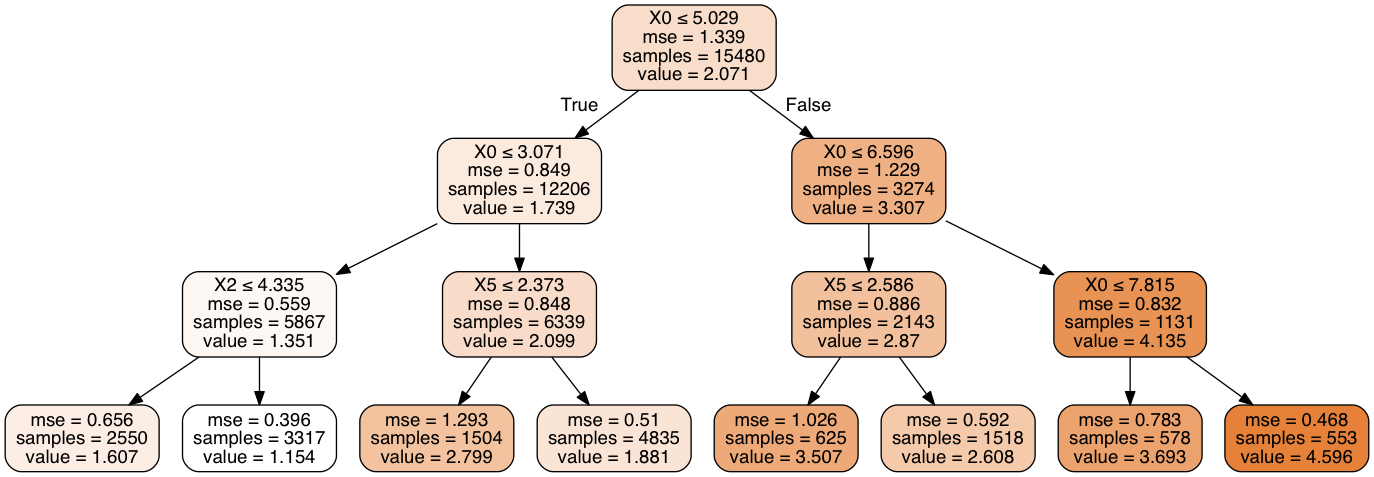

In [11]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [12]:
cali.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

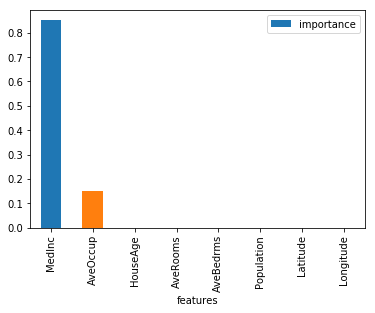

In [19]:
pd.DataFrame({'features': cali.feature_names, 'importance': tree.feature_importances_}).sort_values('importance', ascending = False).plot.bar('features', 'importance')

In [13]:
print(cali.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




### Quandl Stock Data

To obtain your API key, please go to the Quandl documentation [here](https://docs.quandl.com/docs#section-authentication).  

![](images/quandl.png)

In [14]:
import quandl
quandl.ApiConfig.api_key = 'YM-RT4CFETsfzRzTNXKt'

In [21]:
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2012-12-31', 'lte': '2018-07-31' }, 
                        paginate=True)
data.head()

,ticker,date,adj_close
None,,,
0,AAPL,2012-12-31,69.009795
1,AAPL,2013-01-02,71.195748
2,AAPL,2013-01-03,70.296565
3,AAPL,2013-01-04,68.338996
4,AAPL,2013-01-07,67.937002


In [22]:
data.set_index('date', inplace=True)

In [23]:
data.pivot(columns = 'ticker').head()

,adj_close
ticker,AAPL
date,
2012-12-31,69.009795
2013-01-02,71.195748
2013-01-03,70.296565
2013-01-04,68.338996
2013-01-07,67.937002


Below are the parameters for queries to Quandl:

<table>
<thead>
<tr>
<th>Parameter</th>
<th>Required</th>
<th>Type</th>
<th>Values</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>database_code</td>
<td>yes</td>
<td>string</td>
<td></td>
<td>Code identifying the database to which the dataset belongs.</td>
</tr>
<tr>
<td>dataset_code</td>
<td>yes</td>
<td>string</td>
<td></td>
<td>Code identifying the dataset.</td>
</tr>
<tr>
<td>limit</td>
<td>no</td>
<td>int</td>
<td></td>
<td>Use <code>limit=n</code> to get the first n rows of the dataset. Use <code>limit=1</code> to get just the latest row.</td>
</tr>
<tr>
<td>column_index</td>
<td>no</td>
<td>int</td>
<td></td>
<td>Request a specific column. Column 0 is the date column and is always returned. Data begins at column 1.</td>
</tr>
<tr>
<td>start_date</td>
<td>no</td>
<td>string</td>
<td>yyyy-mm-dd</td>
<td>Retrieve data rows on and after the specified start date.</td>
</tr>
<tr>
<td>end_date</td>
<td>no</td>
<td>string</td>
<td>yyyy-mm-dd</td>
<td>Retrieve data rows up to and including the specified end date.</td>
</tr>
<tr>
<td>order</td>
<td>no</td>
<td>string</td>
<td>asc<br>desc</td>
<td>Return data in ascending or descending order of date. Default is <code>desc</code>.</td>
</tr>
<tr>
<td>collapse</td>
<td>no</td>
<td>string</td>
<td>none<br>daily<br>weekly<br>monthly<br>quarterly<br>annual</td>
<td>Change the sampling frequency of the returned data. Default is <code>none</code>; i.e., data is returned in its original granularity.</td>
</tr>
<tr>
<td>transform</td>
<td>no</td>
<td>string</td>
<td>none<br>diff<br>rdiff<br>rdiff_from<br>cumul<br>normalize</td>
<td>Perform elementary calculations on the data prior to downloading. Default is <code>none</code>. Calculation options are described below.</td>
</tr>
</tbody>
</table>

In [24]:
data["2016-01"].pivot(columns = 'ticker')

,adj_close
ticker,AAPL
date,
2016-01-04,101.783763
2016-01-05,99.233131
2016-01-06,97.291172
2016-01-07,93.185040
2016-01-08,93.677776
2016-01-11,95.194629
2016-01-12,96.576222
2016-01-13,94.093220


In [25]:
data.loc["2016-01":"2016-02"].pivot(columns = 'ticker')

,adj_close
ticker,AAPL
date,
2016-01-04,101.783763
2016-01-05,99.233131
2016-01-06,97.291172
2016-01-07,93.185040
2016-01-08,93.677776
2016-01-11,95.194629
2016-01-12,96.576222
2016-01-13,94.093220


In [26]:
stocks = data.pivot(columns = 'ticker')

In [27]:
stocks.head()

,adj_close
ticker,AAPL
date,
2012-12-31,69.009795
2013-01-02,71.195748
2013-01-03,70.296565
2013-01-04,68.338996
2013-01-07,67.937002


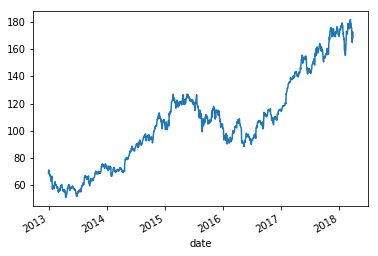

In [28]:
stocks.plot(legend=False)

In [29]:
stocks.iloc[0]

           ticker
adj_close  AAPL      69.009795
Name: 2012-12-31 00:00:00, dtype: float64

In [30]:
stocks.iloc[-1]

           ticker
adj_close  AAPL      168.34
Name: 2018-03-27 00:00:00, dtype: float64

In [139]:
stocks.iloc[-1] - stocks.iloc[0]

           ticker
adj_close  AAPL      99.330205
dtype: float64

In [31]:
#for more on multiple indicies resulting from pivot tables, see
#https://pandas.pydata.org/pandas-docs/version/0.22/reshaping.html
stocks = stocks['adj_close']

In [32]:
stocks.columns

Index(['AAPL'], dtype='object', name='ticker')

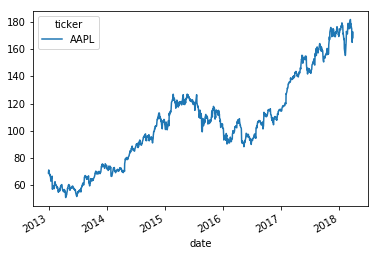

In [33]:
stocks.plot()

In [34]:
stocks.diff().head()

ticker,AAPL
date,
2012-12-31,NaN
2013-01-02,2.185953
2013-01-03,-0.899183
2013-01-04,-1.957569
2013-01-07,-0.401994


In [35]:
diffs = stocks.diff()

### Goal



In [36]:
daily_rtn = stocks.diff()/stocks * 100

In [37]:
daily_rtn[:5]

ticker,AAPL
date,
2012-12-31,NaN
2013-01-02,3.070342
2013-01-03,-1.279128
2013-01-04,-2.864497
2013-01-07,-0.591716


In [147]:
stocks.head(), diffs.head()

(ticker           AAPL
 date                 
 2012-12-31  69.009795
 2013-01-02  71.195748
 2013-01-03  70.296565
 2013-01-04  68.338996
 2013-01-07  67.937002, ticker          AAPL
 date                
 2012-12-31       NaN
 2013-01-02  2.185953
 2013-01-03 -0.899183
 2013-01-04 -1.957569
 2013-01-07 -0.401994)

In [148]:
2/69 * 100

2.898550724637681

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2012-12-31 to 2018-03-27
Data columns (total 2 columns):
ticker       1317 non-null object
adj_close    1317 non-null float64
dtypes: float64(1), object(1)
memory usage: 70.9+ KB


In [62]:
for i in range(1, 21, 1):
    data.loc[:, 'close_minus' + str(i)] = data['adj_close']
    data20 = data[[x for x in data.columns if 'close_minus' in x or x == 'adj_close']].iloc[20:,]

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1317 entries, 2012-12-31 to 2018-03-27
Data columns (total 22 columns):
ticker           1317 non-null object
adj_close        1317 non-null float64
close_minus1     1317 non-null float64
close_minus2     1317 non-null float64
close_minus3     1317 non-null float64
close_minus4     1317 non-null float64
close_minus5     1317 non-null float64
close_minus6     1317 non-null float64
close_minus7     1317 non-null float64
close_minus8     1317 non-null float64
close_minus9     1317 non-null float64
close_minus10    1317 non-null float64
close_minus11    1317 non-null float64
close_minus12    1317 non-null float64
close_minus13    1317 non-null float64
close_minus14    1317 non-null float64
close_minus15    1317 non-null float64
close_minus16    1317 non-null float64
close_minus17    1317 non-null float64
close_minus18    1317 non-null float64
close_minus19    1317 non-null float64
close_minus20    1317 non-null float64
dtypes: float64(21

In [64]:
data.head()

,ticker,adj_close,close_minus1,close_minus2,close_minus3,close_minus4,close_minus5,close_minus6,close_minus7,close_minus8,...,close_minus11,close_minus12,close_minus13,close_minus14,close_minus15,close_minus16,close_minus17,close_minus18,close_minus19,close_minus20
date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,AAPL,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,...,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795
2013-01-02,AAPL,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,...,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748
2013-01-03,AAPL,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,...,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565
2013-01-04,AAPL,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,...,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996
2013-01-07,AAPL,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,...,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002


In [65]:
sp20 = data.iloc[:, ::-1]

In [66]:
sp20.head()

,close_minus20,close_minus19,close_minus18,close_minus17,close_minus16,close_minus15,close_minus14,close_minus13,close_minus12,close_minus11,...,close_minus8,close_minus7,close_minus6,close_minus5,close_minus4,close_minus3,close_minus2,close_minus1,adj_close,ticker
date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,...,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,69.009795,AAPL
2013-01-02,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,...,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,AAPL
2013-01-03,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,...,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,70.296565,AAPL
2013-01-04,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,...,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,68.338996,AAPL
2013-01-07,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,...,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,67.937002,AAPL


In [67]:
sp20.shape

(1317, 22)

In [85]:
X_train = sp20[:-1300].drop(['ticker', 'adj_close'], axis = 1)
X_test = sp20[-1300:].drop(['ticker', 'adj_close'], axis = 1)
y_train = sp20['adj_close'].shift(-1)[:-1300]
y_test = sp20['adj_close'].shift(-1)[-1300:]

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [96]:
y_test.shape

(1300,)

In [97]:
X_test.shape

(1300, 20)

In [98]:
lr.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [101]:
X_test = X_test[:-1]
y_test.dropna(inplace = True)
X_test.shape, y_test.shape

((1299, 20), (1299,))

In [105]:
lr.score(X_test, y_test)
np.sqrt(mean_squared_error(tree.predict(X_test), y_test))

49.27782638449033

In [106]:
np.sqrt(mean_squared_error(lr.predict(X_test), y_test))

3.971762366348074

In [107]:
np.sqrt(mean_squared_error(tree.predict(X_train), y_train))

0.0

In [108]:
np.sqrt(mean_squared_error(lr.predict(X_train), y_train))

2.345727023369648

In [87]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

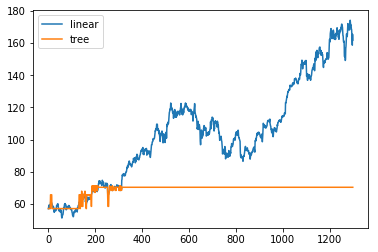

In [91]:
plt.plot(pred, label = 'linear')
plt.plot(tree_pred, label = 'tree')

plt.legend()

In [92]:
X_train.describe()

,close_minus20,close_minus19,close_minus18,close_minus17,close_minus16,close_minus15,close_minus14,close_minus13,close_minus12,close_minus11,close_minus10,close_minus9,close_minus8,close_minus7,close_minus6,close_minus5,close_minus4,close_minus3,close_minus2,close_minus1
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699,66.562699
std,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314,2.956314
min,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819,58.418819
25%,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288,65.185288
50%,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209,67.055209
75%,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845,68.119845
max,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748,71.195748


In [94]:
tree_pred.max()

71.195747808479

In [83]:
pred[::20]

array([ 71.02637186,  80.15276951,  85.45215853,  87.72196784,
        92.02398653,  96.19411599,  92.21619653,  98.71533255,
       109.9047758 , 105.65644472, 103.56510293, 121.76197804,
       120.86284898, 118.27844136, 122.56655384, 120.81755478,
       119.57907436, 108.60537468, 105.43346037, 106.03175558,
       116.68710846, 110.69978963, 101.30526454,  90.93790538,
        97.4352348 , 105.3365131 ,  91.75858825,  97.69781043,
        90.93487819,  94.73601271, 106.0759486 , 110.98389135,
       114.76669307, 105.25719864, 113.1350616 , 116.88874631,
       131.34164617, 136.92297126, 139.50800604, 150.89586758,
       153.21089932, 142.58264918, 154.58736095, 160.82826867,
       153.32573026, 167.69901438, 170.47297924, 167.88657784,
       165.65555983, 176.66257343])

In [84]:
tree_pred[::20]

array([70.9707998 , 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645,
       75.45611645, 75.45611645, 75.45611645, 75.45611645, 75.45611645])